In [89]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import mycomm

In [90]:
"""パラメータの設定"""
BANDWIDTH = 25.0
CARRIER_FREQ = 50.0
MULTIPLE_LEVEL = 4

snRatio = 0.0

samplingFreq = 20.0*CARRIER_FREQ
samplingPeriod = 1.0/samplingFreq

timePeriod = 1.0/BANDWIDTH
bitsPerSymbol = np.log2(MULTIPLE_LEVEL)

filterSpan = 6;
samplesPerSymbol = np.math.floor(timePeriod/samplingPeriod);
nTaps = filterSpan*samplesPerSymbol + 1
filterDA = scipy.signal.firwin(numtaps=nTaps, cutoff=BANDWIDTH, fs=samplingFreq)
filterDelay = ((filterSpan*samplesPerSymbol)/2.0)*((samplesPerSymbol-filterSpan/2)/samplesPerSymbol)

t = np.arange(0.0, timePeriod, samplingPeriod)

c:\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


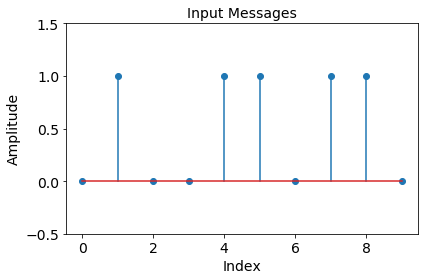

In [91]:
"""入力ビット列の確認"""
messages = np.array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0])

plt.figure()
plt.stem(messages)
plt.ylim([-0.5, 1.5])
plt.title("Input Messages", fontsize=14)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Amplitude", fontsize=14)
plt.tick_params(labelsize=14)
plt.tight_layout()

c:\python\python37-32\lib\site-packages\ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
c:\python\python37-32\lib\site-packages\ipykernel_launcher.py:30: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


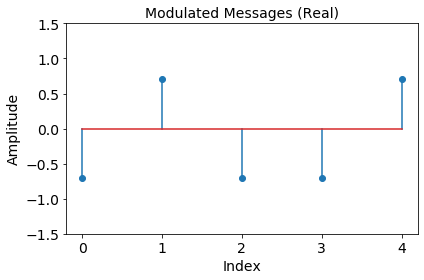

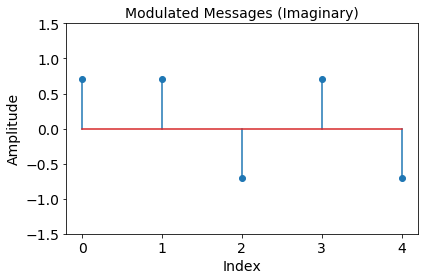

In [92]:
"""変調シンボル列の確認"""
infoBinary = np.array([messages[0:: 2], messages[1:: 2]])

theta = np.zeros(np.size(infoBinary, axis=1), dtype='float')
for k in range(np.size(infoBinary, axis=1)):
    bit1 = infoBinary[0,k]
    bit2 = infoBinary[1,k]
    if bit1 == 0 and bit2 == 0:
        theta[k] = np.math.pi/4.0
    elif bit1 == 0 and bit2 == 1:
        theta[k] = 3.0*np.math.pi/4.0
    elif bit1 == 1 and bit2 == 1:
        theta[k] = 5.0*np.math.pi/4.0
    elif bit1 == 1 and bit2 == 0:
        theta[k] = 7.0*np.math.pi/4.0
amplitude = 1.0
uI = amplitude*np.cos(theta)
uQ = amplitude*np.sin(theta)

infoModulated = uI + 1j*uQ

plt.figure()
plt.stem(infoModulated.real)
plt.ylim([-1.5, 1.5])
plt.title("Modulated Messages (Real)", fontsize=14)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Amplitude", fontsize=14)
plt.tick_params(labelsize=14)
plt.tight_layout()
plt.figure()
plt.stem(infoModulated.imag)
plt.ylim([-1.5, 1.5])
plt.title("Modulated Messages (Imaginary)", fontsize=14)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Amplitude", fontsize=14)
plt.tick_params(labelsize=14)
plt.tight_layout()

c:\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  after removing the cwd from sys.path.


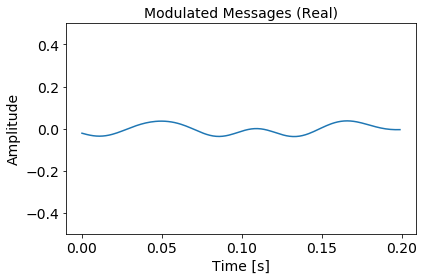

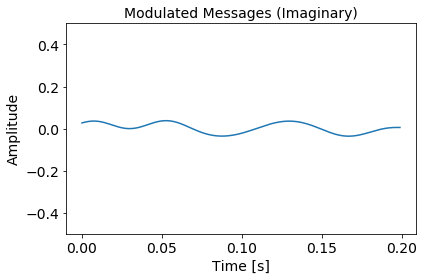

In [93]:
"""DAC通過後の信号確認"""
tt = np.arange(0.0, np.size(infoModulated)*timePeriod, samplingPeriod)

signalContinuousTilde = scipy.signal.upfirdn(filterDA, infoModulated, samplesPerSymbol)
signalContinuousTilde = np.delete(signalContinuousTilde, np.arange(0.0, filterDelay, 1.0))
signalContinuous = signalContinuousTilde[0:np.size(tt)]

plt.figure()
plt.plot(tt, signalContinuous.real)
plt.ylim([-0.5, 0.5])
plt.title("Modulated Messages (Real)", fontsize=14)
plt.xlabel("Time [s]", fontsize=14)
plt.ylabel("Amplitude", fontsize=14)
plt.tick_params(labelsize=14)
plt.tight_layout()
plt.figure()
plt.plot(tt, signalContinuous.imag)
plt.ylim([-0.5, 0.5])
plt.title("Modulated Messages (Imaginary)", fontsize=14)
plt.xlabel("Time [s]", fontsize=14)
plt.ylabel("Amplitude", fontsize=14)
plt.tick_params(labelsize=14)
plt.tight_layout()

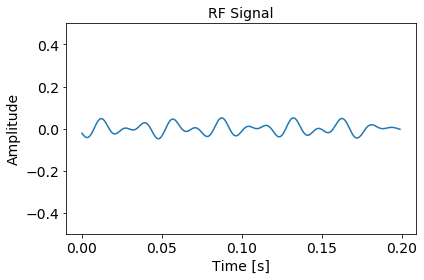

In [94]:
"""RFにアップコンバージョン後の信号確認"""
signalComplexRF = signalContinuous*np.exp(1j*2.0*np.math.pi*CARRIER_FREQ*tt)
    
signalRF = signalComplexRF.real

plt.figure()
plt.plot(tt, signalRF)
plt.ylim([-0.5, 0.5])
plt.title("RF Signal", fontsize=14)
plt.xlabel("Time [s]", fontsize=14)
plt.ylabel("Amplitude", fontsize=14)
plt.tick_params(labelsize=14)
plt.tight_layout()

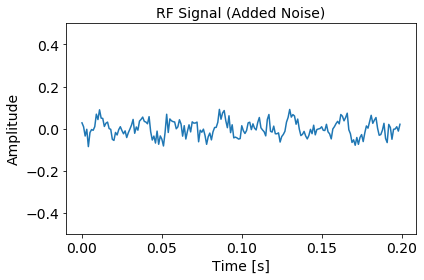

In [95]:
"""雑音印加後の信号確認"""
commpath = mycomm.CommPath()

signalAddedNoiseTilde = commpath.awgn(signalRF, snRatio)
signalAddedNoise = signalAddedNoiseTilde.flatten()

plt.figure()
plt.plot(tt, signalAddedNoise)
plt.ylim([-0.5, 0.5])
plt.title("RF Signal (Added Noise)", fontsize=14)
plt.xlabel("Time [s]", fontsize=14)
plt.ylabel("Amplitude", fontsize=14)
plt.tick_params(labelsize=14)
plt.tight_layout()

c:\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
c:\python\python37-32\lib\site-packages\ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


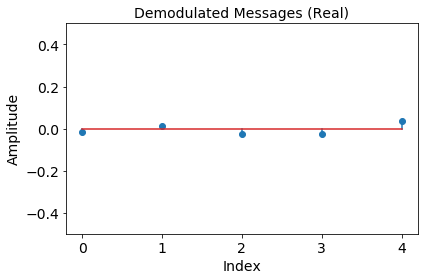

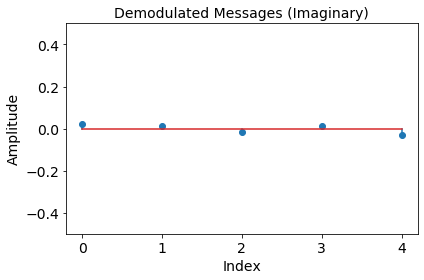

In [96]:
"""復調シンボル列の確認"""
signalLPF = np.zeros(np.size(infoModulated), dtype='complex')
for k in range(np.size(infoModulated)):
    signalLPF[k] = np.sum(signalAddedNoise[k*t.size:(k+1)*t.size]*np.exp(-1j*2.0*np.math.pi*CARRIER_FREQ*t))*(2.0/(timePeriod*samplingFreq))
    
plt.figure()
plt.stem(signalLPF.real)
plt.ylim([-0.5, 0.5])
plt.title("Demodulated Messages (Real)", fontsize=14)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Amplitude", fontsize=14)
plt.tick_params(labelsize=14)
plt.tight_layout()
plt.figure()
plt.stem(signalLPF.imag)
plt.ylim([-0.5, 0.5])
plt.title("Demodulated Messages (Imaginary)", fontsize=14)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Amplitude", fontsize=14)
plt.tick_params(labelsize=14)
plt.tight_layout()

c:\python\python37-32\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
c:\python\python37-32\lib\site-packages\ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


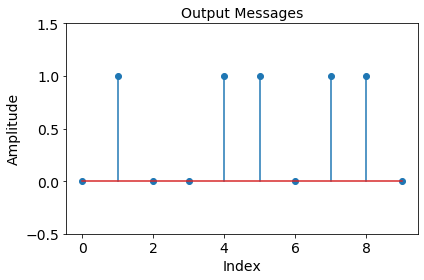

In [97]:
"""出力ビット列の確認"""
receivedInfoBinary = np.zeros((np.size(infoBinary, axis=0),np.size(infoModulated)), dtype='float')
for k in range(np.size(infoModulated)):
    phi = np.angle(signalLPF[k])
    if phi >= 0.0 and phi < np.math.pi/2.0:
        receivedInfoBinary[0,k] = 0
        receivedInfoBinary[1,k] = 0
    elif phi >= np.math.pi/2.0 and phi < np.math.pi:
        receivedInfoBinary[0,k] = 0
        receivedInfoBinary[1,k] = 1
    elif phi < 0 and phi >= -np.math.pi/2.0:
        receivedInfoBinary[0,k] = 1
        receivedInfoBinary[1,k] = 0
    elif phi < -np.math.pi/2.0 and phi >= -np.math.pi:
        receivedInfoBinary[0,k] = 1
        receivedInfoBinary[1,k] = 1
        
recievedMessages = receivedInfoBinary.flatten(1)

plt.figure()
plt.stem(recievedMessages)
plt.ylim([-0.5, 1.5])
plt.title("Output Messages", fontsize=14)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Amplitude", fontsize=14)
plt.tick_params(labelsize=14)
plt.tight_layout()

In [98]:
"""ビット誤り率の確認"""
bitErrorRate = (np.sum(np.abs(messages-recievedMessages)))/(np.size(messages))
print(bitErrorRate)

0.0
